Test TrainGen functions

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%load_ext autoreload
    
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')

In [401]:
data[data['ptl_idx']==8]

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste
165,8,1,0,1,0,50,0.1,0.0,0.0,0,90.481219,14.469942
166,8,5,20,5,20,15,0.1,0.0,0.0,0,75.608965,10.622388
167,8,5,40,5,40,15,0.1,0.0,0.0,0,92.605393,4.578616
168,8,5,80,5,80,15,0.1,0.0,0.0,0,124.544603,6.776351


In [216]:
data['dt2'].max()

112.3534155

Test PairPtl class.

In [266]:
from modelval.pairptl import PairPtl

Test KernelGen object

In [171]:
from modelval.kernel import KernelGen

In [172]:
ker_test = KernelGen(reso_kernel=2, len_kernel = 101)

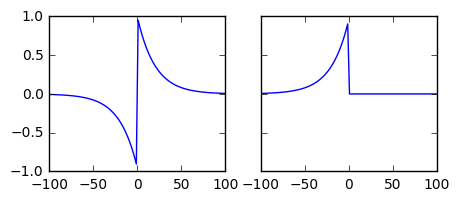

In [173]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True)
fig.set_figwidth(5)
fig.set_figheight(2)
bi_ker = ker_test.bi_exp_ker(tau_left=20, tau_right=20)
ax[0].plot(ker_test.x, bi_ker)
ax[0].set_xlim(-100, 100)
uni_ker = ker_test.uni_exp_ker(tau=20, side='left')
ax[1].plot(ker_test.x, uni_ker)

Test KernelGen function

In [346]:
from modelval.TrainGen import arb_spk_w_gen

In [402]:
test_ptl = PairPtl(*data.iloc[167])
spk_time_pre, spk_time_post, pre_spk, post_spk = arb_spk_w_gen(test_ptl, ker_test)

Sjostrom&Nelson, 2001, Fig7D (Freq dependence, 0ms), pre_spk_num=5, post_spk_num=5,dt=0.00


In [403]:
spk_time_pre

array([  457,   469,   481,   493,   505,  5457,  5469,  5481,  5493,
        5505, 10457, 10469, 10481, 10493, 10505, 15457, 15469, 15481,
       15493, 15505, 20457, 20469, 20481, 20493, 20505, 25457, 25469,
       25481, 25493, 25505, 30457, 30469, 30481, 30493, 30505, 35457,
       35469, 35481, 35493, 35505, 40457, 40469, 40481, 40493, 40505,
       45457, 45469, 45481, 45493, 45505, 50457, 50469, 50481, 50493,
       50505, 55457, 55469, 55481, 55493, 55505, 60457, 60469, 60481,
       60493, 60505, 65457, 65469, 65481, 65493, 65505, 70457, 70469,
       70481, 70493, 70505])

In [404]:
spk_time_post

array([  457,   469,   481,   493,   505,  5457,  5469,  5481,  5493,
        5505, 10457, 10469, 10481, 10493, 10505, 15457, 15469, 15481,
       15493, 15505, 20457, 20469, 20481, 20493, 20505, 25457, 25469,
       25481, 25493, 25505, 30457, 30469, 30481, 30493, 30505, 35457,
       35469, 35481, 35493, 35505, 40457, 40469, 40481, 40493, 40505,
       45457, 45469, 45481, 45493, 45505, 50457, 50469, 50481, 50493,
       50505, 55457, 55469, 55481, 55493, 55505, 60457, 60469, 60481,
       60493, 60505, 65457, 65469, 65481, 65493, 65505, 70457, 70469,
       70481, 70493, 70505])

[400, 600, 0.9, 1.1]

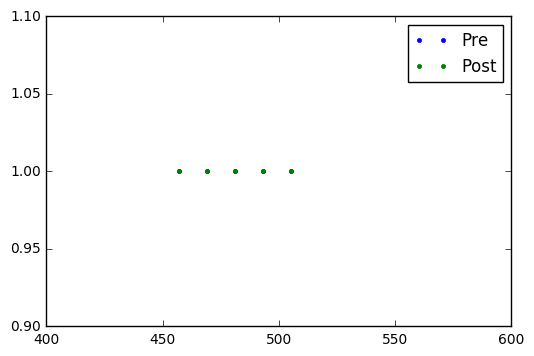

In [408]:
plt.plot(spk_time_pre[:20], np.ones(20), '.', label='Pre')
plt.plot(spk_time_post[:10], np.ones(10), '.', label='Post')
plt.legend()
plt.axis([400,600,0.9,1.1])